# Random Forest Classification

## Bank Note Authentication

<a href="Dataset Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data">Download Dataset</a>

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

## Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Declaring the Dependent & the Independent Variables

In [3]:
X = df.iloc[:,:-1].values

y = df.iloc[:, -1].values

## Splitting the Dataset into the Training Set and Test Set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Random Forest Model

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

## Feature Importances

In [6]:
df_feature = df.drop('class', axis=1)

feature_importances = pd.DataFrame(data = df_feature.columns.values, columns = ['Features'])

feature_importances['Importance'] =  model.feature_importances_

feature_importances.sort_values('Importance',ascending=False)

,Features,Importance
0,variance,0.550730
1,skewness,0.238210
2,curtosis,0.156523
3,entropy,0.054537


## Predicting the Test Set Results

In [7]:
y_pred = model.predict(X_test)

## Confusion Matrix

Accuracy is: 98.79 %


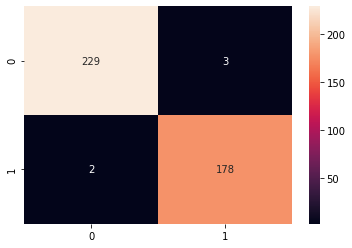

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy is: {:.2f} %".format(accuracy*100))

sns.heatmap(cm, annot=True, fmt='d')

plt.show()

## Classification Report

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



## K-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 9)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.37 %
Standard Deviation: 0.77 %


## Saving the Model 

In [11]:
import pickle

pickle_out = open("RFClassifier.pkl","wb")

pickle.dump(model, pickle_out)

pickle_out.close()